   surface  nb_pieces  age  quartier    prix
0      142          5   32         3  472290
1      132          6    0         2  495843
2       54          6   18         3  253992
3      146          3   30         3  477561
4      111          2   15         1  360855


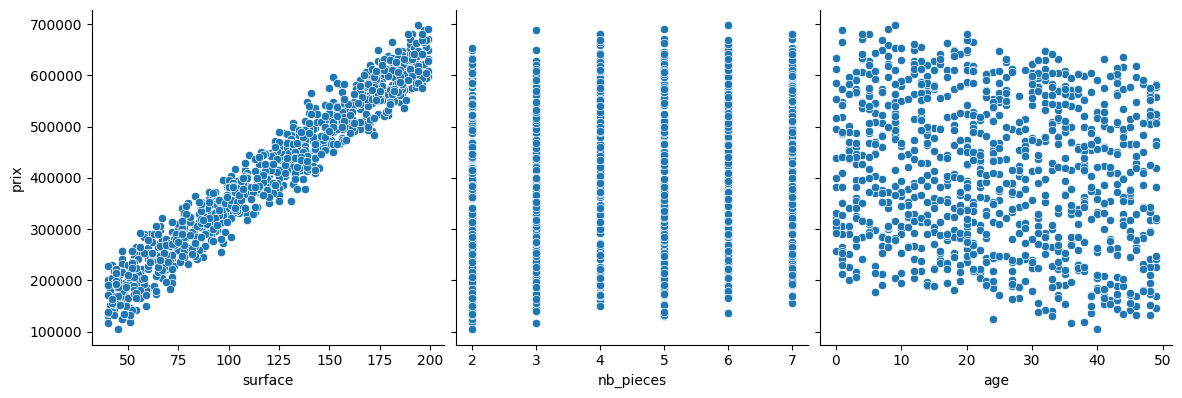

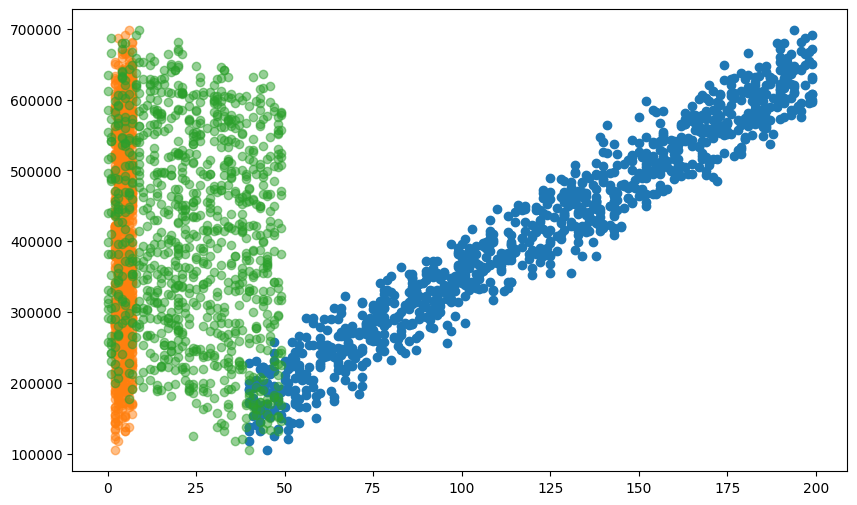

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Charger le fichier CSV
df = pd.read_csv("maisons.csv")
print(df.head())
# Séparer les caractéristiques et la cible
X = df[['surface', 'nb_pieces', 'age', 'quartier']]
y = df['prix']

#nuage des points
# Convertir les variables catégorielles en variables numériques
X = pd.get_dummies(X, columns=['quartier'], drop_first=True)
#tracer les nuages de points pour tous les attributs
import seaborn as sns
sns.pairplot(df, x_vars=['surface', 'nb_pieces', 'age'], y_vars='prix', height=4, aspect=1, kind='scatter')
#rassembler tous en un seul graphique
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))     
plt.scatter(df['surface'], df['prix'], label='Surface')
plt.scatter(df['nb_pieces'], df['prix'], label='Nombre de pièces', alpha=0.5)   
plt.scatter(df['age'], df['prix'], label='Âge', alpha=0.5)

Évaluation du arbre decision:
✔️ MSE : 727552897.11
✔️ MAE : 21824.65
✔️ R² : 0.97
✔️ MAPE: 5.71%
✔️ RMSE: 26973.19


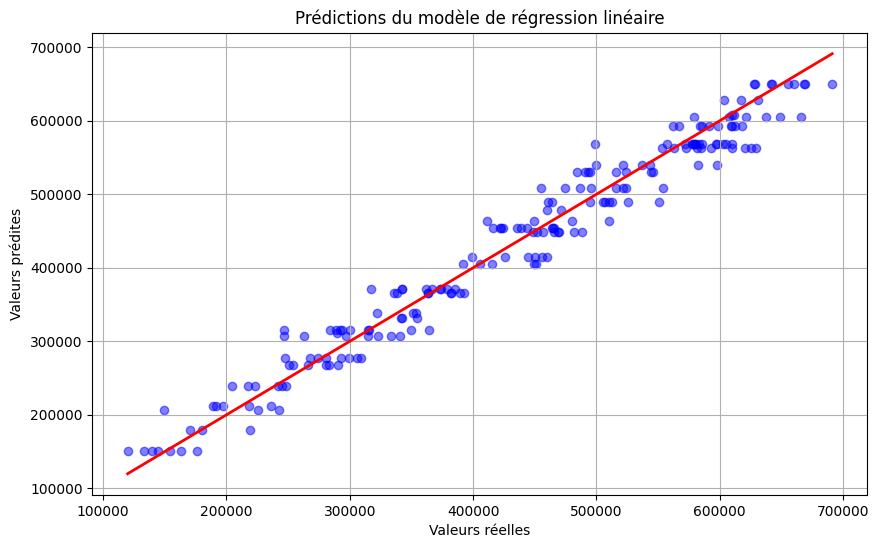

In [5]:
# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeRegressor
# Création et entraînement de l'arbre de décision
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
reg_tree.fit(X_train, y_train)

# Prédiction
y_pred = reg_tree.predict(X_test)

# 5. Évaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
MAE = np.mean(np.abs(y_test - y_pred))
RMSE = np.sqrt(mse)

print("Évaluation du arbre decision:")
print(f"✔️ MSE : {mse:.2f}")
print(f"✔️ MAE : {mae:.2f}")
print(f"✔️ R² : {r2:.2f}")
print(f"✔️ MAPE: {MAPE:.2f}%")
print(f"✔️ RMSE: {RMSE:.2f}")
# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Prédictions du modèle de régression linéaire')
plt.grid(True)
plt.show()



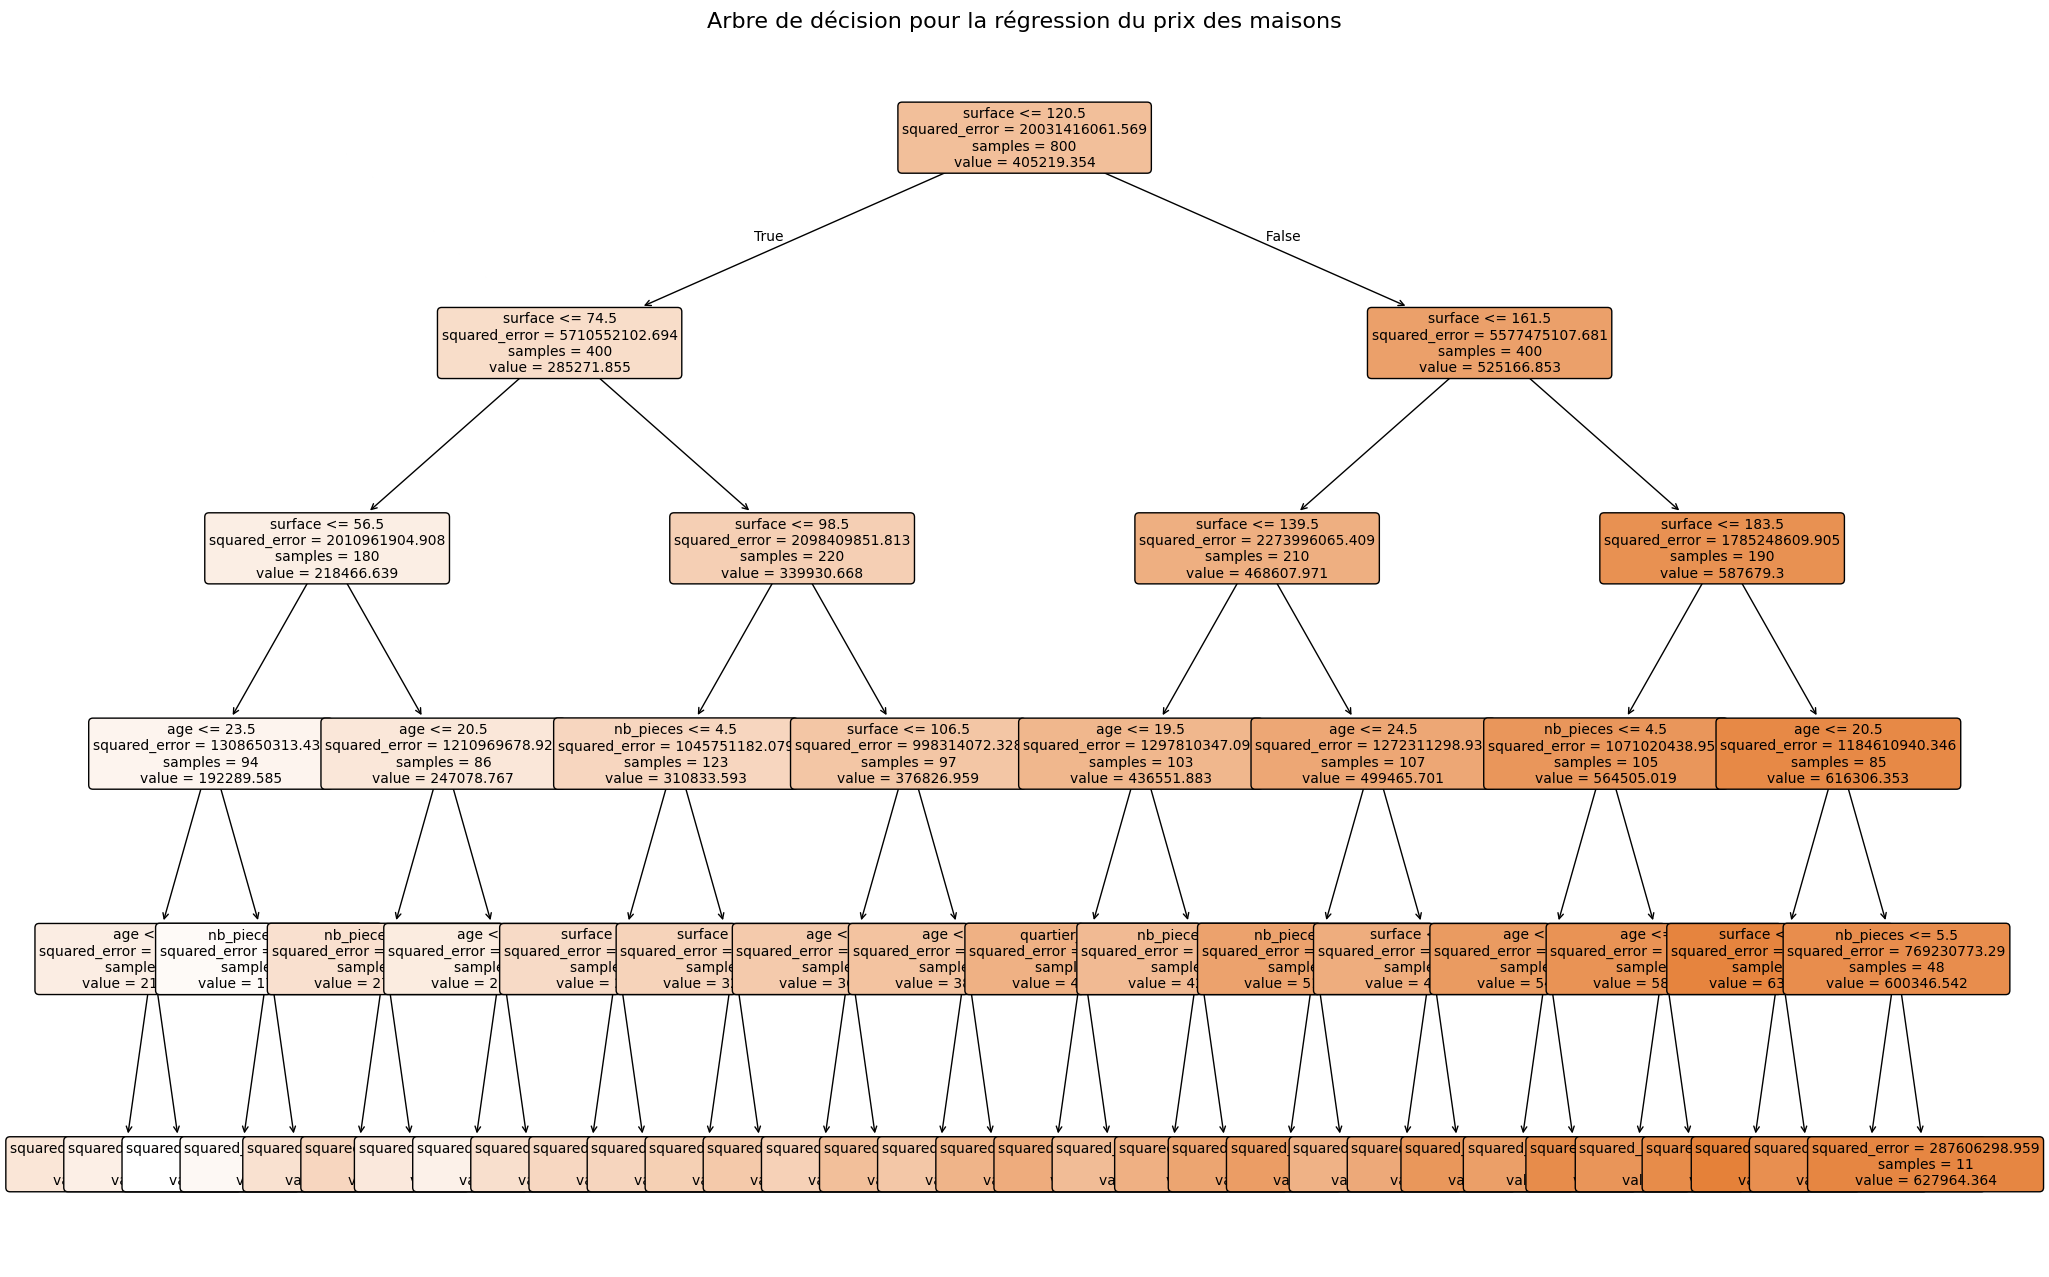

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 16))  # Essaye même 30, 20 si nécessaire
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Arbre de décision pour la régression du prix des maisons", fontsize=16)
plt.show()
